<a href="https://colab.research.google.com/github/Gustavo-Bento/Gustavo-Bento/blob/master/Aula_03_Calculando_corre%C3%A7%C3%A3o_entre_dolar_e_Ibovespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 03 Obtendo tratamento de dados

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

# Instale e atualize yfinance se ainda não foi feito
!pip install yfinance --upgrade --no-cache-dir

# Importe yfinance
import yfinance as yf

In [27]:
# Defina os tickers
tickers = ["^BVSP", "USDBRL=X"]

data = yf.download(tickers,start="2007-01-01")
carteira = data['Close']
carteira = carteira.dropna()

carteira

[*********************100%%**********************]  2 of 2 completed


Ticker,USDBRL=X,^BVSP
Date,,
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
2007-01-08,2.1465,42830.000000
...,...,...
2024-07-30,5.6145,126139.000000
2024-07-31,5.6111,127652.000000
2024-08-01,5.6566,127395.000000


In [38]:
carteira.columns = ["DOLAR","IBOV"]
carteira

,DOLAR,IBOV
Date,,
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
2007-01-08,2.1465,42830.000000
...,...,...
2024-07-30,5.6145,126139.000000
2024-07-31,5.6111,127652.000000
2024-08-01,5.6566,127395.000000


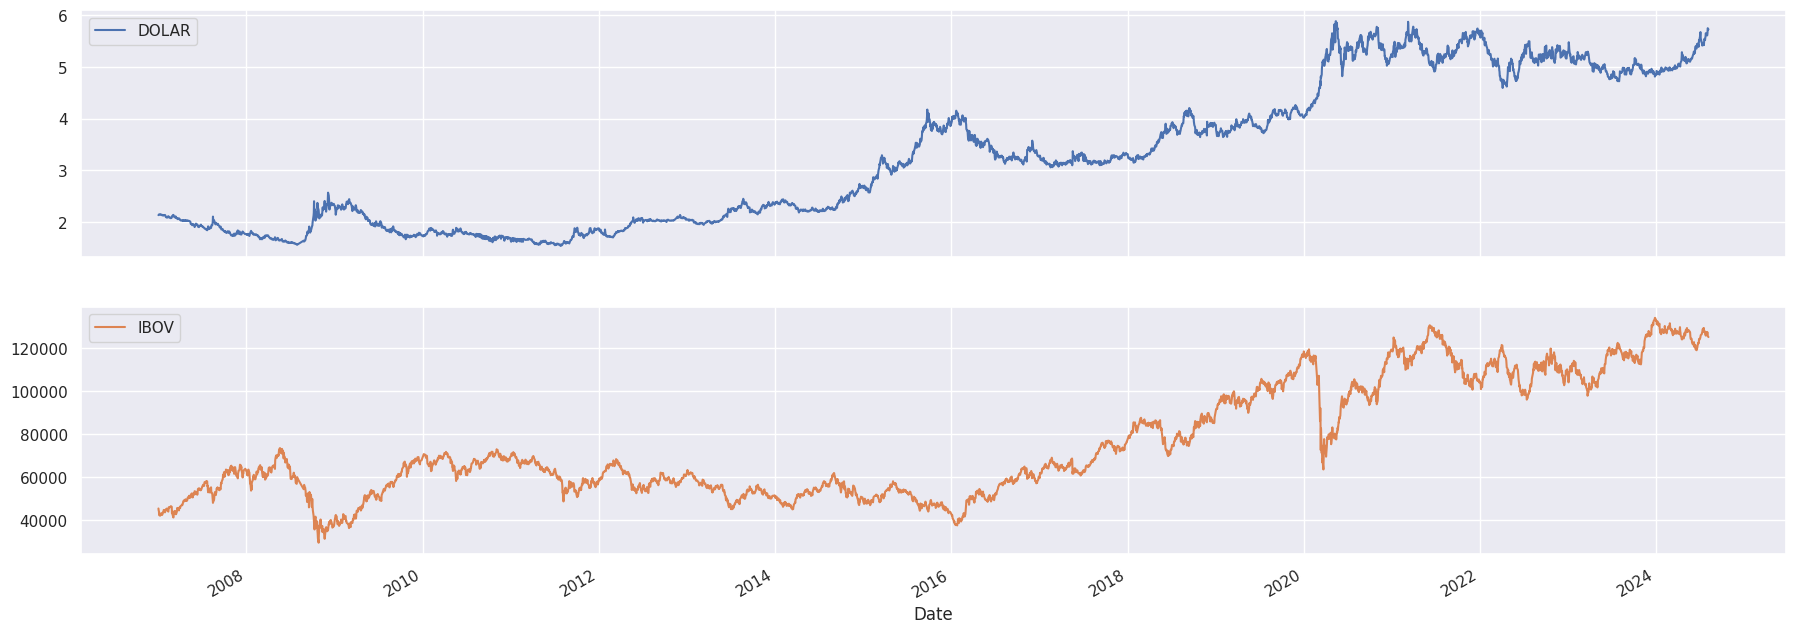

In [39]:
sns.set()
carteira.plot(subplots=True, figsize=(22, 8))
plt.show()

<Axes: >

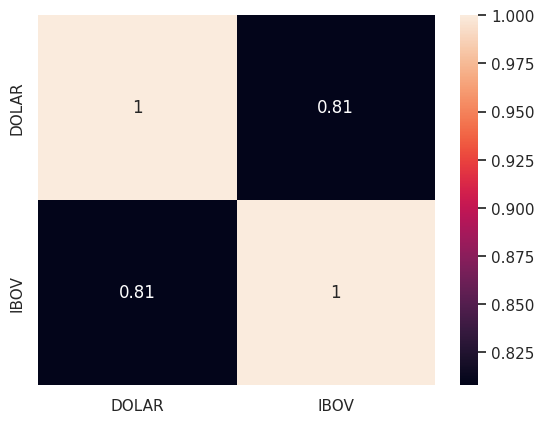

In [40]:
sns.heatmap(carteira.corr(), annot=True)

<Axes: xlabel='Date'>

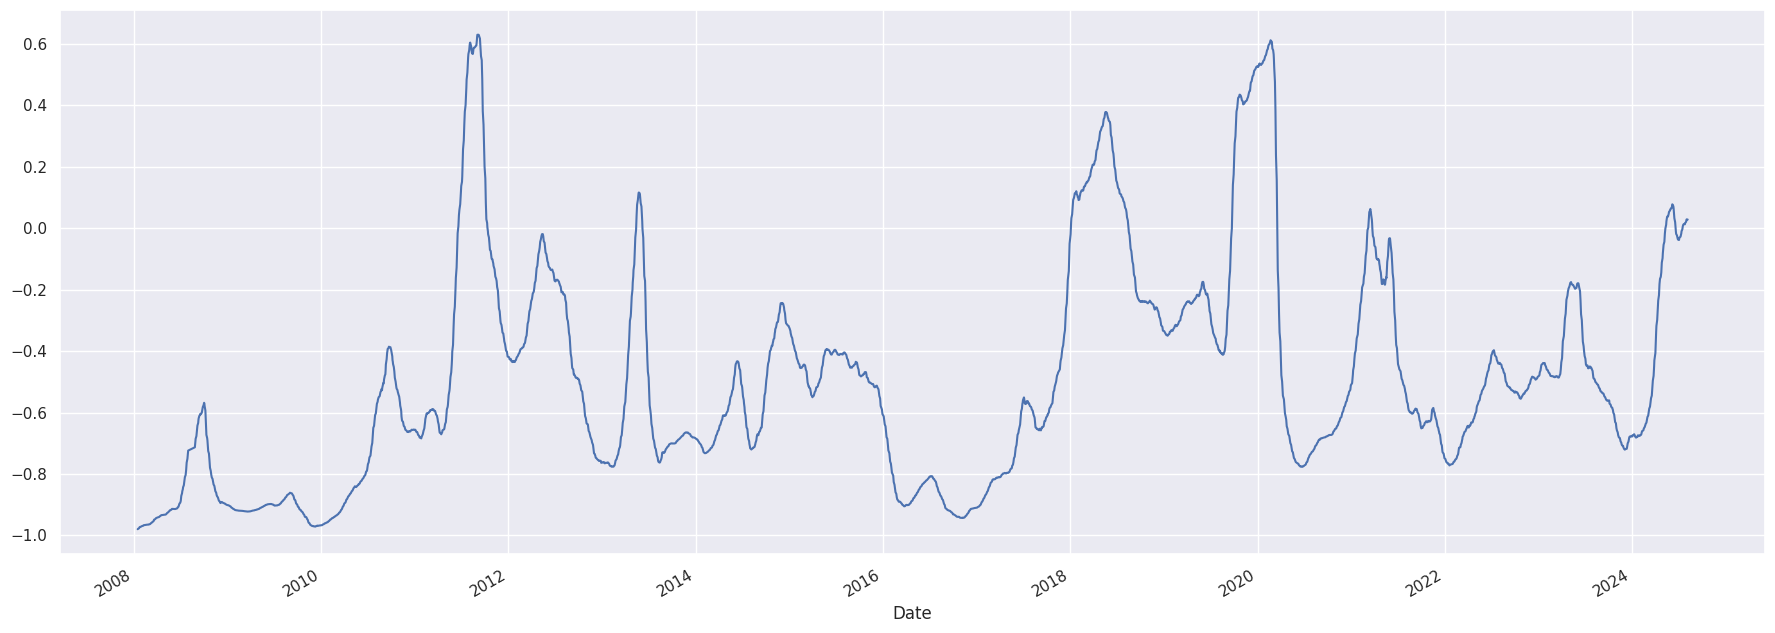

In [41]:
carteira["DOLAR"].rolling(252).corr(carteira["IBOV"]).plot(figsize=(22, 8))

In [42]:
carteira["IBOV_DOLARIZADO"]=(carteira["IBOV"]/carteira["DOLAR"])
carteira

,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.1310,45383.000000,21296.573959
2007-01-03,2.1345,44445.000000,20822.206345
2007-01-04,2.1390,44020.000000,20579.710732
2007-01-05,2.1470,42245.000000,19676.291819
2007-01-08,2.1465,42830.000000,19953.411504
...,...,...,...
2024-07-30,5.6145,126139.000000,22466.648672
2024-07-31,5.6111,127652.000000,22749.905637
2024-08-01,5.6566,127395.000000,22521.479340


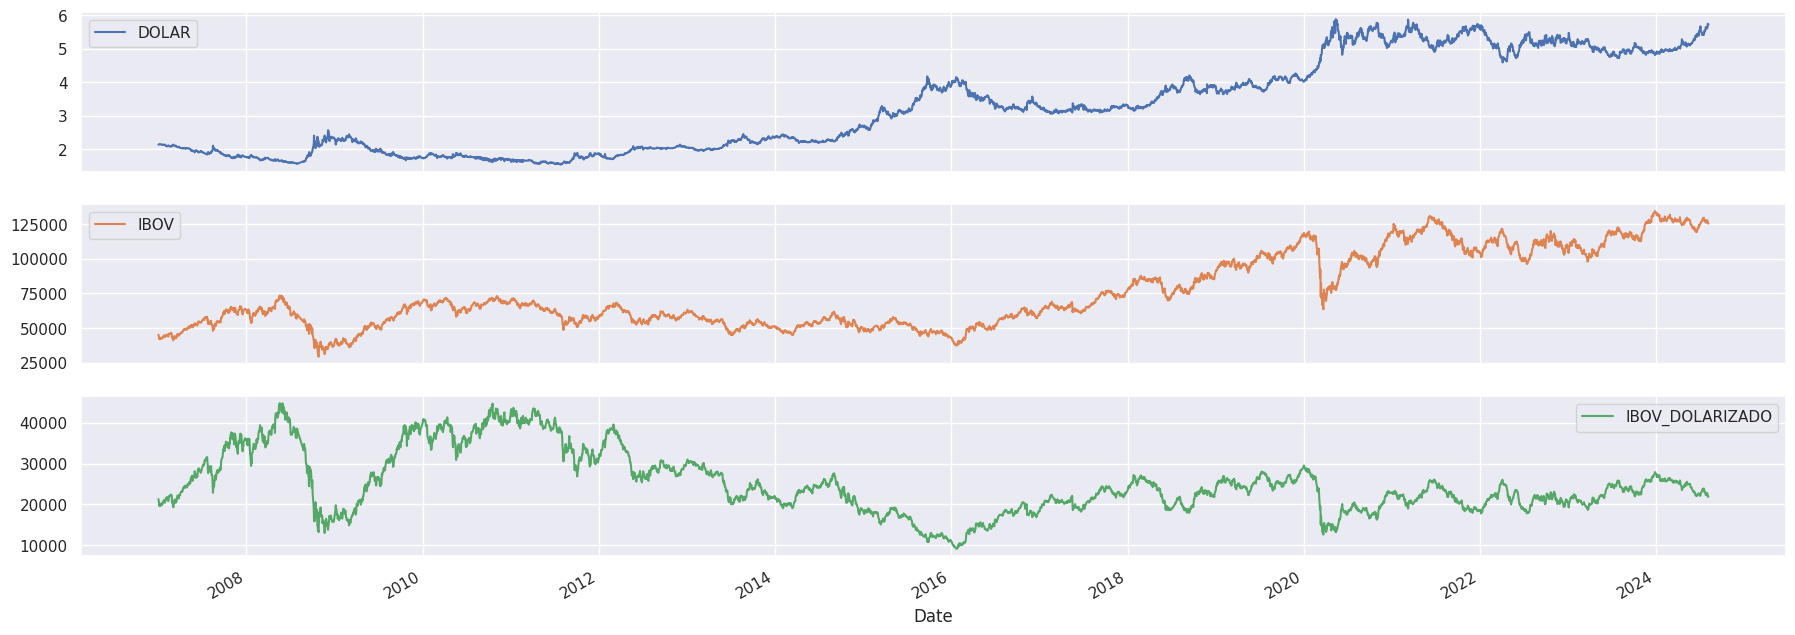

In [43]:
sns.set()
carteira.plot(subplots=True, figsize=(22, 8))
plt.show()